import all necessary libraries to proceed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

to load the dataset for analysis

In [2]:
df = pd.read_csv("insurance.csv")

To check the first five in dataset to using .head() function

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To check the last five in dataset to using .tail() function

In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


To check the dataset information use .info()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


To check the shape and size of the dataset

In [7]:
df.shape,df.size

((1338, 7), 9366)

To chek the dataset count,mean,std,min,quantile and max using .describe()

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


TO check null values to using isnull and count the null value to use sum,so that we getting the null values count

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

to check the not null values

In [10]:
df.notnull().sum()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

To check the duplicate values to use duplicated() function and get the duplicated count to use .sum().

In [11]:
df.duplicated().sum()

1

For plotting pie chart we do the piviot table for region and age mean.

In [12]:
pie =pd.pivot_table(df,index = 'region',values = ['age'],aggfunc='mean')

In [13]:
pie

,age
region,
northeast,39.268519
northwest,39.196923
southeast,38.939560
southwest,39.455385


Below pie chart telling that each region average age people

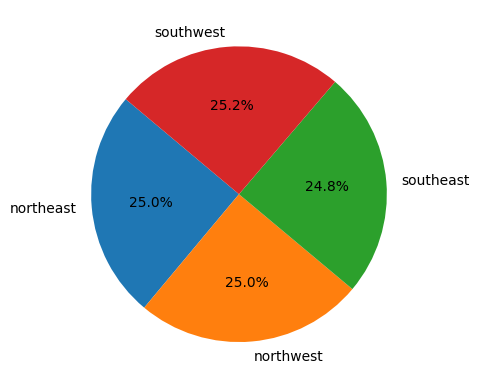

In [14]:
plt.pie(pie.age,labels = pie.index,autopct='%1.1f%%', startangle=140)
plt.show()

The below scatter plot shows the relationship between the bmi and charges. The scatter plot telling that it have outliers

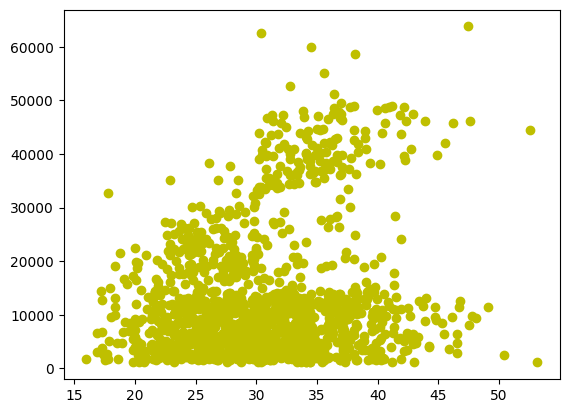

In [15]:
plt.scatter(df.bmi,df.charges,color='y')
plt.show()

The below barplot telling that how many female&male have smoking habit or not depends on age

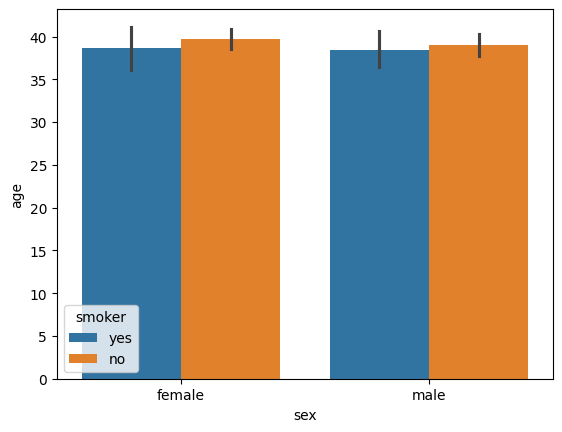

In [16]:
sns.barplot(df,x='sex',y='age',hue='smoker')
plt.show()

The bmi and charges column is a mixed data type so we convert its as float to .astype(float)

In [17]:
df['bmi'] = df['bmi'].astype(float)
df['charges'] = df['charges'].astype(float)

we encoding a data to proceed the linear regression model. To use label encoder to change the catagorical data to numerical data.
to import the library for label encoder


In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df.sex =label_encoder.fit_transform(df['sex'])
df.smoker =label_encoder.fit_transform(df['smoker'])
df.region =label_encoder.fit_transform(df['region'])

To check the data chage or not to head()

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


To check the correlation of the data

In [20]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


To drop the column region. i feel its unwanted column

In [21]:
df = df.drop(['region'],axis=1)

In [22]:
df

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


To show the heatmap for correlation for better understanding

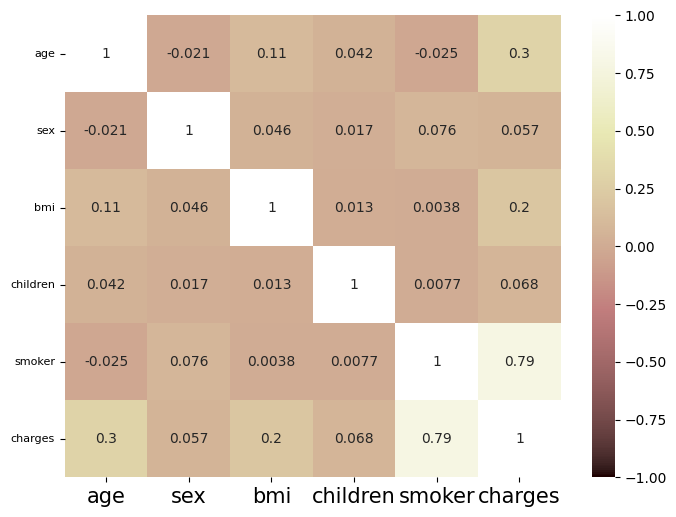

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot = True,cbar = True,vmin = -1,vmax =1,cmap='pink')
plt.yticks(rotation = 'horizontal',fontsize = 8)
plt.xticks(fontsize = 15)
plt.show()

To change charges column value to standard scaler To proceed linear regression.
to import the library for Standardscaler

In [24]:
from sklearn.preprocessing import StandardScaler
charges_scaler =StandardScaler()

to transform the standardscaler value to charges to use fit_transform

In [25]:
df.charges = charges_scaler.fit_transform(df[['charges']])

In [26]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,0.298584
1,18,1,33.770,1,0,-0.953689
2,28,1,33.000,3,0,-0.728675
3,33,1,22.705,0,0,0.719843
4,32,1,28.880,0,0,-0.776802


To assign the value x and drop the charges column

In [27]:
x=df.drop(['charges'],axis =1)
x

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


assign a target value to y

In [28]:
y=df[['charges']]

split x and y value for train and test to use library train_test_split

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 50) 

To check the shape of x_train,x_test,y_train and y_test

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1003, 5), (335, 5), (1003, 1), (335, 1))

To implement the linear regression model using library

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model_lr = LinearRegression()

To train linearregression model

In [33]:
model_lr.fit(x_train,y_train)

LinearRegression()

To check the coef value of the model

In [34]:
model_lr.coef_

array([[ 0.02095873, -0.01639027,  0.02510579,  0.03433472,  1.9609878 ]])

To check the intercept value of the model

In [35]:
model_lr.intercept_

array([-2.02637421])

To predict the y value

In [36]:
y_pre = model_lr.predict(x_test)

In [37]:
y_pre

array([[-0.42511086],
       [-0.13606406],
       [ 0.31487692],
       [-0.15321937],
       [-1.05421806],
       [ 2.12852802],
       [ 1.09976096],
       [-0.44114598],
       [-1.00545053],
       [-0.12864331],
       [-0.32088002],
       [ 1.57555668],
       [-0.42607488],
       [ 1.48292213],
       [-0.45450305],
       [-0.29276528],
       [-0.14033291],
       [-0.7075903 ],
       [-0.08145522],
       [-0.38262682],
       [-1.18127517],
       [ 1.94987692],
       [-0.5581082 ],
       [-0.36033331],
       [-0.73229901],
       [-0.19598453],
       [-0.63504169],
       [ 2.04855952],
       [-1.04570547],
       [-1.08594006],
       [ 1.99572673],
       [-0.73845901],
       [ 0.10733782],
       [-0.96800558],
       [-0.99161121],
       [-0.6049866 ],
       [-0.31239009],
       [-0.97609553],
       [-0.09928795],
       [ 2.158883  ],
       [-0.30059692],
       [-0.54136147],
       [ 0.30241443],
       [ 0.00912776],
       [ 1.84031144],
       [ 0

r2 score to find a statistical measure in a regression model

In [38]:
R2_score = model_lr.score(x_train,y_train)

In [39]:
R2_score*100

73.94830872933609

To find the accuracy of the model using a library mean_squared_error

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
accuracy = 1-mean_squared_error(y_test,y_pre)

In [42]:
accuracy*100

77.26830289915996

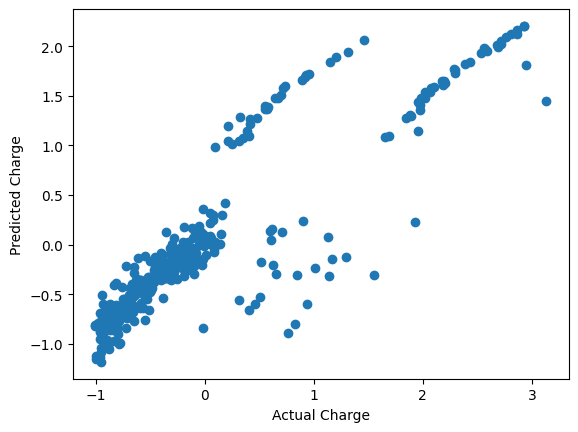

In [46]:
plt.scatter(y_test,y_pre)
plt.xlabel('Actual Charge')
plt.ylabel('Predicted Charge')
plt.show()

To give a input value for x features

In [42]:
new_age =(input('Enter your age '))
new_sex =(input('Enter your sex '))
new_bmi =(input('Enter your bmi '))
new_children =(input('Enter your children '))
new_smoker =(input('Enter your smoker '))

Enter your age  60
Enter your sex  2
Enter your bmi  26.3
Enter your children  3
Enter your smoker  1


to create a dataframe for x variable

In [43]:
x_new =pd.DataFrame([[new_age,new_sex,new_bmi,new_children,new_smoker]])
x_new

,0,1,2,3,4
0,60,2,26.3,3,1


predit a new_charge values

In [47]:
new_charge = model_lr.predict(x_new)

C:\Users\Megala\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


inverse the new_charge value for real time using inverse_transform

In [48]:
new_charges= charges_scaler.inverse_transform(new_charge)

In [49]:
new_charges

array([[36544.95466808]])